# Kickstarter

In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd    
import seaborn as sns

%matplotlib inline

In [3]:
!ls 

01-md5.ipynb           ks-projects-201801.csv


In [4]:
# pathlib or os.path: pick one
INPUT_PATH = Path('')
DF_PATH = os.path.join(INPUT_PATH, "ks-projects-201801.csv")
DF_PATH

'./ks-projects-201801.csv'

In [6]:
!head ./ks-projects-201801.csv # only on UNIX

In [7]:
df = pd.read_csv(DF_PATH, index_col='ID')
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [8]:
len(df.index) == df.index.nunique() # check whether ID is unique

True

In [9]:
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


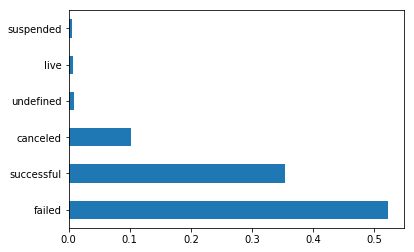

In [11]:
df['state'].value_counts(normalize=True).plot(kind="barh");

In [12]:
df.loc[df['state'] == 'undefined'].head(15)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00


In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
SELECTED_COLUMNS = ['goal', 'pledged', 'backers', 'usd_pledged_real', 'usd_goal_real']
X = df[SELECTED_COLUMNS]
X.head()

,goal,pledged,backers,usd_pledged_real,usd_goal_real
ID,,,,,
1000002330,1000.0,0.0,0,0.0,1533.95
1000003930,30000.0,2421.0,15,2421.0,30000.00
1000004038,45000.0,220.0,3,220.0,45000.00
1000007540,5000.0,1.0,1,1.0,5000.00
1000011046,19500.0,1283.0,14,1283.0,19500.00


In [16]:
y = df['state']
y.head()

ID
1000002330      failed
1000003930      failed
1000004038      failed
1000007540      failed
1000011046    canceled
Name: state, dtype: object

In [18]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pred = rf.predict(X)
y_pred

array(['failed', 'failed', 'failed', ..., 'failed', 'failed', 'failed'],
      dtype=object)

In [20]:
y == y_pred

ID
1000002330     True
1000003930     True
1000004038     True
1000007540     True
1000011046     True
1000014025     True
1000023410     True
1000030581     True
1000034518     True
100004195      True
100004721      True
100005484      True
1000055792     True
1000056157     True
1000057089     True
1000064368     True
1000064918     True
1000068480     True
1000070642     True
1000071625     True
1000072011     True
1000081649     True
1000082254     True
1000087442     True
1000091520     True
1000102741     True
1000103948     True
1000104688     True
1000104953     True
100011318      True
              ...  
999832803      True
99984851       True
999865831      True
999867839      True
99987261       True
999877902      True
999878813      True
999880710      True
999884445      True
999893629     False
99991751       True
999929142      True
999931480     False
999934908      True
999941823      True
999943841      True
999950812      True
999955533     False
999963618      Tr

In [21]:
np.all(y == y_pred)

False

In [22]:
np.sum(y == y_pred) / len(df)

0.9484446510203057

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y, y_pred)

0.9484446510203057

In [25]:
rf.score(X, y)

0.9484446510203057

# Train test split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((283995, 5), (283995,), (94666, 5), (94666,))

In [28]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
accuracy_score(y_test, rf.predict(X_test))

0.8558722244522848

In [30]:
accuracy_score(y_train, rf.predict(X_train))

0.9497596788675857

In [31]:
df.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'goal',
       'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

# Let's add some new features

In [32]:
NEW_FEATURES = ['main_category', 'currency', 'country']

In [33]:
X = df[SELECTED_COLUMNS + NEW_FEATURES]
X.head()

,goal,pledged,backers,usd_pledged_real,usd_goal_real,main_category,currency,country
ID,,,,,,,,
1000002330,1000.0,0.0,0,0.0,1533.95,Publishing,GBP,GB
1000003930,30000.0,2421.0,15,2421.0,30000.00,Film & Video,USD,US
1000004038,45000.0,220.0,3,220.0,45000.00,Film & Video,USD,US
1000007540,5000.0,1.0,1,1.0,5000.00,Music,USD,US
1000011046,19500.0,1283.0,14,1283.0,19500.00,Film & Video,USD,US


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((283995, 8), (283995,), (94666, 8), (94666,))

In [35]:
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Design'

In [36]:
df['currency'].unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [37]:
currency_mapper = {v: i for i, v in enumerate(df['currency'].unique())}
currency_mapper

{'GBP': 0,
 'USD': 1,
 'CAD': 2,
 'AUD': 3,
 'NOK': 4,
 'EUR': 5,
 'MXN': 6,
 'SEK': 7,
 'NZD': 8,
 'CHF': 9,
 'DKK': 10,
 'HKD': 11,
 'SGD': 12,
 'JPY': 13}

In [38]:
country_mapper = {v: i for i, v in enumerate(df['country'].unique())}
country_mapper

{'GB': 0,
 'US': 1,
 'CA': 2,
 'AU': 3,
 'NO': 4,
 'IT': 5,
 'DE': 6,
 'IE': 7,
 'MX': 8,
 'ES': 9,
 'N,0"': 10,
 'SE': 11,
 'FR': 12,
 'NL': 13,
 'NZ': 14,
 'CH': 15,
 'AT': 16,
 'DK': 17,
 'BE': 18,
 'HK': 19,
 'LU': 20,
 'SG': 21,
 'JP': 22}

In [39]:
main_category_mapper = {v: i for i, v in enumerate(df['main_category'].unique())}
main_category_mapper

{'Publishing': 0,
 'Film & Video': 1,
 'Music': 2,
 'Food': 3,
 'Design': 4,
 'Crafts': 5,
 'Games': 6,
 'Comics': 7,
 'Fashion': 8,
 'Theater': 9,
 'Art': 10,
 'Photography': 11,
 'Technology': 12,
 'Dance': 13,
 'Journalism': 14}

In [40]:
X['currency'] = X['currency'].map(currency_mapper)
X['currency'].head()

/usr/local/opt/pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ID
1000002330    0
1000003930    1
1000004038    1
1000007540    1
1000011046    1
Name: currency, dtype: int64

In [41]:
X['country'] = X['country'].map(country_mapper)
X['country'].head()

/usr/local/opt/pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ID
1000002330    0
1000003930    1
1000004038    1
1000007540    1
1000011046    1
Name: country, dtype: int64

In [42]:
X['main_category'] = X['main_category'].map(main_category_mapper)
X['main_category'].head()

/usr/local/opt/pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


ID
1000002330    0
1000003930    1
1000004038    1
1000007540    2
1000011046    1
Name: main_category, dtype: int64

In [43]:
X.head()

,goal,pledged,backers,usd_pledged_real,usd_goal_real,main_category,currency,country
ID,,,,,,,,
1000002330,1000.0,0.0,0,0.0,1533.95,0,0,0
1000003930,30000.0,2421.0,15,2421.0,30000.00,1,1,1
1000004038,45000.0,220.0,3,220.0,45000.00,1,1,1
1000007540,5000.0,1.0,1,1.0,5000.00,2,1,1
1000011046,19500.0,1283.0,14,1283.0,19500.00,1,1,1


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((283995, 8), (283995,), (94666, 8), (94666,))

In [45]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred.shape, y_train_pred.shape

((94666,), (283995,))

In [47]:
accuracy_score(y_train, y_train_pred)

0.9618267927252241

In [48]:
accuracy_score(y_test, y_test_pred)

0.8599708448651047

# Categorical encoding

## With pandas

In [49]:
X = df[SELECTED_COLUMNS + NEW_FEATURES]
X.head()

,goal,pledged,backers,usd_pledged_real,usd_goal_real,main_category,currency,country
ID,,,,,,,,
1000002330,1000.0,0.0,0,0.0,1533.95,Publishing,GBP,GB
1000003930,30000.0,2421.0,15,2421.0,30000.00,Film & Video,USD,US
1000004038,45000.0,220.0,3,220.0,45000.00,Film & Video,USD,US
1000007540,5000.0,1.0,1,1.0,5000.00,Music,USD,US
1000011046,19500.0,1283.0,14,1283.0,19500.00,Film & Video,USD,US


In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 8 columns):
goal                378661 non-null float64
pledged             378661 non-null float64
backers             378661 non-null int64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
main_category       378661 non-null object
currency            378661 non-null object
country             378661 non-null object
dtypes: float64(4), int64(1), object(3)
memory usage: 26.0+ MB


In [51]:
for c in X.select_dtypes('object').columns:
    X[c] = X[c].astype('category').cat.codes

/usr/local/opt/pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 8 columns):
goal                378661 non-null float64
pledged             378661 non-null float64
backers             378661 non-null int64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
main_category       378661 non-null int8
currency            378661 non-null int8
country             378661 non-null int8
dtypes: float64(4), int64(1), int8(3)
memory usage: 18.4 MB


In [53]:
X['currency'] = X['currency'].cat.codes
X.head()

AttributeError: Can only use .cat accessor with a 'category' dtype

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((283995, 8), (283995,), (94666, 8), (94666,))

In [55]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)
y_test_pred.shape, y_train_pred.shape

((94666,), (283995,))

In [57]:
accuracy_score(y_train, y_train_pred)

0.9623514498494692

In [58]:
accuracy_score(y_test, y_test_pred)

0.857837027021317

## with Scikit-Learn's LabelEncoder

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
X = df[SELECTED_COLUMNS + NEW_FEATURES]
X.head()

,goal,pledged,backers,usd_pledged_real,usd_goal_real,main_category,currency,country
ID,,,,,,,,
1000002330,1000.0,0.0,0,0.0,1533.95,Publishing,GBP,GB
1000003930,30000.0,2421.0,15,2421.0,30000.00,Film & Video,USD,US
1000004038,45000.0,220.0,3,220.0,45000.00,Film & Video,USD,US
1000007540,5000.0,1.0,1,1.0,5000.00,Music,USD,US
1000011046,19500.0,1283.0,14,1283.0,19500.00,Film & Video,USD,US


In [62]:
for c in X.select_dtypes('object').columns:
    X[c] = le.fit_transform(X[c])

/usr/local/opt/pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [63]:
X.head()

,goal,pledged,backers,usd_pledged_real,usd_goal_real,main_category,currency,country
ID,,,,,,,,
1000002330,1000.0,0.0,0,0.0,1533.95,12,5,9
1000003930,30000.0,2421.0,15,2421.0,30000.00,6,13,22
1000004038,45000.0,220.0,3,220.0,45000.00,6,13,22
1000007540,5000.0,1.0,1,1.0,5000.00,10,13,22
1000011046,19500.0,1283.0,14,1283.0,19500.00,6,13,22


In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 8 columns):
goal                378661 non-null float64
pledged             378661 non-null float64
backers             378661 non-null int64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
main_category       378661 non-null int64
currency            378661 non-null int64
country             378661 non-null int64
dtypes: float64(4), int64(4)
memory usage: 26.0 MB
